In [6]:
import iamend_ci as ci

In [7]:
help(ci)

Help on package iamend_ci:

NAME
    iamend_ci

PACKAGE CONTENTS
    ax
    bo
    fit
    plt
    so
    theo

FILE
    c:\users\fernando\documents\github\iamend_ci\iamend_ci\__init__.py




### Carga  y correccion datos

In [8]:
data=ci.so.load('C:/Users/fernando/tesis/labs/impedancias/pp1/enero 18')

C:/Users/fernando/tesis/labs/impedancias/pp1/enero 18
0 EXP00.csv
1 EXP3948.csv
2 EXPm316p2.csv


In [9]:
data

[[array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00, ...,
          4.49000000e+02, 4.50000000e+02, 4.51000000e+02],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
          1.10000000e+01, 1.10000000e+01, 1.10000000e+01],
         [1.00000000e+02, 1.12201800e+02, 1.25892500e+02, ...,
          7.94328200e+03, 8.91250900e+03, 1.00000000e+04],
         [5.56199200e+00, 5.56157700e+00, 5.56050300e+00, ...,
          5.56609500e+00, 5.56754100e+00, 5.58289600e+00],
         [2.17309500e-01, 2.43977200e-01, 2.73719400e-01, ...,
          1.72260100e+01, 1.93392700e+01, 2.16726700e+01],
         [6.28318531e+02, 7.04984701e+02, 7.91005906e+02, ...,
          4.99091128e+04, 5.59989456e+04, 6.28318531e+04]]),
  array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00, ...,
          4.49000000e+02, 4.50000000e+02, 4.51000000e+02],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
          1.10000000e+01, 1.10000000e+01, 1.10000000e+01],
         [1.00000000e+

In [10]:
f=ci.so.getf(data)

bo=ci.bo.bobpp1

datacorr=ci.so.corr(f,bo,data)

### grafico datos
uso la libreria plotly para ver todos las mediciones al mismo tiempo

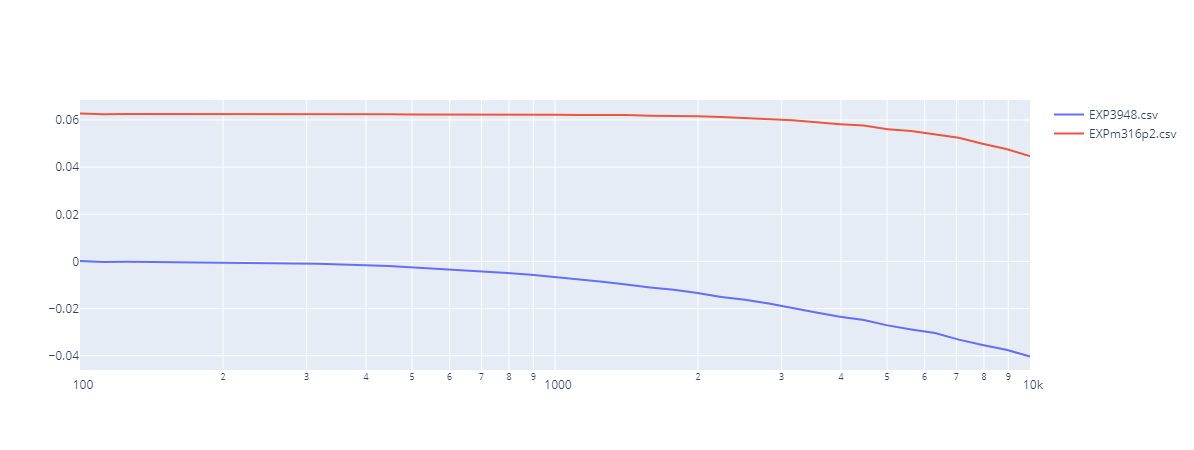

In [11]:
a=ci.plt.semilog(f,datacorr)

uso matplotlib, mas rapida y liviana

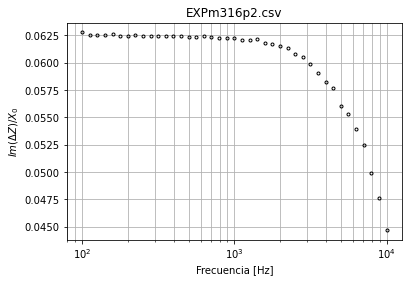

In [12]:
ci.plt.im(f,datacorr,1)

## Ajuste de datos
* primero el lift-off (cn.fit.z1) sobre el patron
* luego $\mu_r$ (cn.fit.mu) sobre la muestra

In [13]:
ci.fit.z1?


Signature: ci.fit.z1(f, bo, datacorr, n, dpatron, sigma, mur)
Docstring:
z1 (frecuencia, bobina, datacorr, n, dpatron,sigma, mur)
Ajuste del lift-off
Parameters
----------
f : array_like, vector con las frecuencias
datacorr : array_like, matriz con las mediciones
bo: array_like, vector con los parametros geometricos de la bobina
datacorr: array_like, matrix con las mediciones corregidas y nromalizadas
n : int, indice de la medicion 
dpatron: float, espesor muestra
sigma : float, conductividad muestra
mur: float, permeabilidad muestra
File:      c:\users\fernando\documents\github\iamend_ci\iamend_ci\fit.py
Type:      function


z1 = 1.7093226453991799 mm


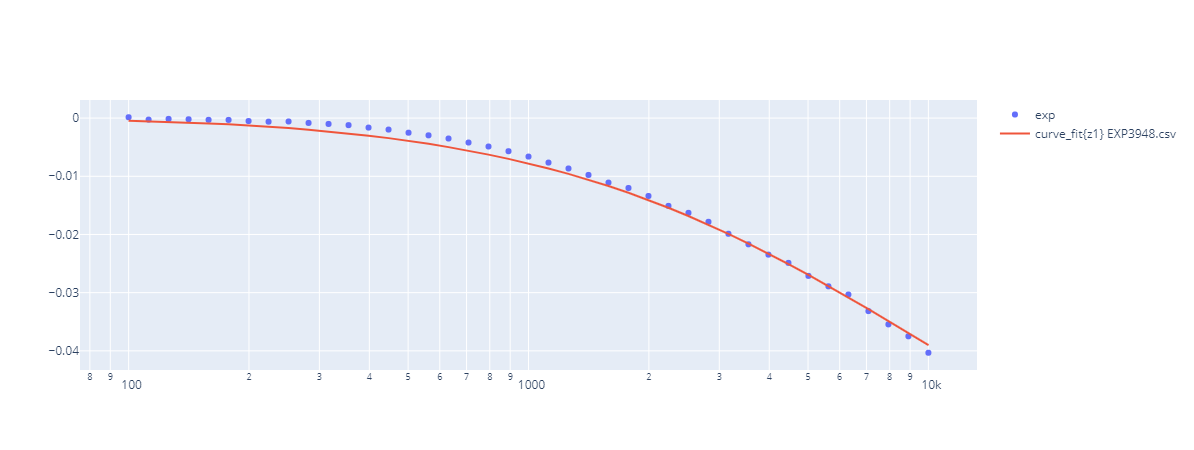

In [14]:
dp=15e-3
sig=4e6
mup=1
# valor ajustado y grafico
z1eff,figz1=ci.fit.z1(f,bo,datacorr,0,dp,sig,mup)
figz1

mu = 16.57721499394157


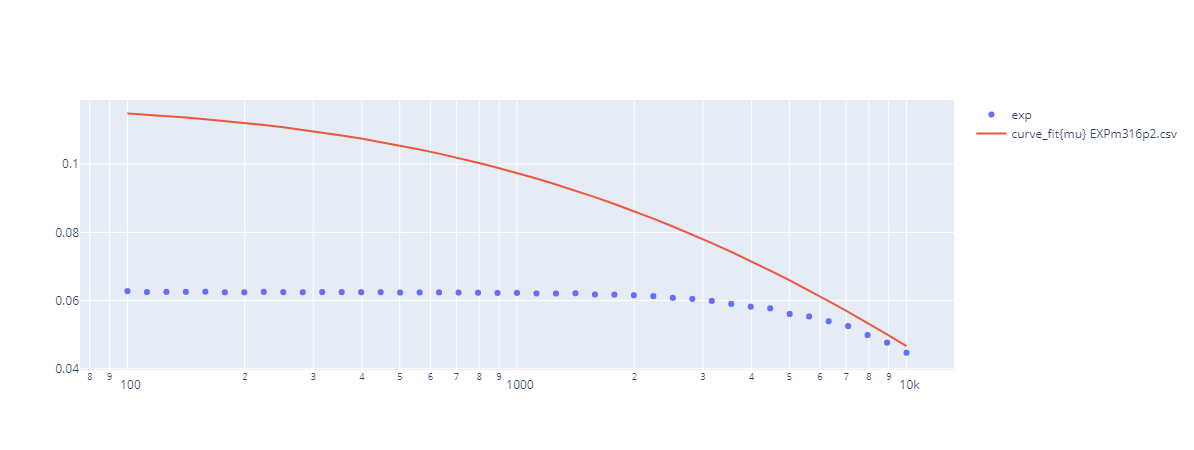

In [15]:
mueff,pltmu=ci.fit.mu(f,bo,datacorr,1,4e6,z1eff)
pltmu